# WeatherPy
----

#### Observable Trends
* The closer to the Equator, the higher the temparature for both the Northern and Southern Hemispheres, but the same significant correlation does not exist for Humidity. Though the Humidity is higher in the Southern Hemisphere when closer to the Equator, it trends in the opposite for those Cities in the Northern Hemisphere. We can note that where the Max Temperature is (in this example 20 degrees Latitude), there is less Clouds and Humidity, showing that Cloudiness may have an affect on the Temperature and Humidity which supports these trends. 
* Wind Speed in the Northern Hemisphere are statistically higher than those in the Southern, and though there shows a correlation of higher speeds the further from the Equator, it is more clearly displayed in those Cities in the Southern Hemisphere. We can also note that where the Wind Speeds are higher the temperatures trend lower showing that Wind Speed may impact the temperature figures in a particular city as it is moving the hot air and affecting temperature readings. 
* It is typically more Cloudy in Cities North of the Equator, and those Cities in the Southern Hemisphere tend to be cloudier when closer to the Equator. Humidity figures follow a similar trend and it's possible that we can state that the Clouds are impacted by the Humidity and where Humidity is high, clouds are likely to appear and when it's lower and temperatures are lowers, they will also appear due to the cool air. 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [34]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Get weather data
weather_data_response = requests.get(query_url + city).json()
print(weather_data_response)

{'coord': {'lon': -70.1431, 'lat': -20.2208}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 58.23, 'temp_min': 59, 'temp_max': 59, 'pressure': 1018, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4.59, 'deg': 200, 'gust': 5.06}, 'clouds': {'all': 0}, 'dt': 1619934682, 'sys': {'type': 1, 'id': 8492, 'country': 'CL', 'sunrise': 1619953032, 'sunset': 1619993861}, 'timezone': -14400, 'id': 3887127, 'name': 'Iquique', 'cod': 200}


In [35]:
#Set up lists to hold response info
City_Name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

#Set Process Counter to 1
Process_Counter = 1

#Print header text
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        City_Name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print(f"Processing Record {Process_Counter} | {city}")
        Process_Counter += 1
    
    except:
        print(f"City not found. Skipping...{city}")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | san vicente
Processing Record 2 | rikitea
Processing Record 3 | dikson
Processing Record 4 | punta arenas
Processing Record 5 | talovaya
Processing Record 6 | albany
Processing Record 7 | butaritari
Processing Record 8 | san quintin
Processing Record 9 | faya
City not found. Skipping...sentyabrskiy
Processing Record 10 | ambon
Processing Record 11 | arraial do cabo
Processing Record 12 | vestmannaeyjar
Processing Record 13 | hobart
Processing Record 14 | leh
Processing Record 15 | sorland
Processing Record 16 | puerto baquerizo moreno
Processing Record 17 | radviliskis
Processing Record 18 | port hardy
Processing Record 19 | talnakh
City not found. Skipping...illoqqortoormiut
Processing Record 20 | morehead
Processing Record 21 | limbe
Processing Record 22 | vaini
Processing Record 23 | bluff
Processing Record 24 | puerto ayora
Processing Record 25 | acari
City not found. Skipping...taolanaro
Processing Record

Processing Record 229 | tiksi
Processing Record 230 | werda
City not found. Skipping...umm durman
Processing Record 231 | rincon
Processing Record 232 | cotonou
Processing Record 233 | kilis
City not found. Skipping...mys shmidta
Processing Record 234 | xichang
Processing Record 235 | banjarmasin
Processing Record 236 | boa vista
Processing Record 237 | ayame
Processing Record 238 | northam
Processing Record 239 | antalaha
Processing Record 240 | pemangkat
Processing Record 241 | deer lake
Processing Record 242 | castrovillari
Processing Record 243 | lagoa
Processing Record 244 | beringovskiy
Processing Record 245 | heinola
Processing Record 246 | mount isa
City not found. Skipping...grand river south east
Processing Record 247 | shimanovsk
Processing Record 248 | beira
Processing Record 249 | kavieng
Processing Record 250 | ailigandi
City not found. Skipping...lolua
Processing Record 251 | mwense
Processing Record 252 | luganville
Processing Record 253 | alibag
Processing Record 254 |

Processing Record 451 | sile
Processing Record 452 | cururupu
Processing Record 453 | djougou
Processing Record 454 | saint-joseph
Processing Record 455 | zyryanka
Processing Record 456 | chiredzi
Processing Record 457 | svetlogorsk
Processing Record 458 | riberalta
Processing Record 459 | iskateley
Processing Record 460 | sheregesh
Processing Record 461 | sao filipe
City not found. Skipping...palabuhanratu
Processing Record 462 | mayumba
Processing Record 463 | kodinsk
Processing Record 464 | nyurba
Processing Record 465 | margate
Processing Record 466 | bathsheba
Processing Record 467 | nieuw amsterdam
Processing Record 468 | gushikawa
Processing Record 469 | monroe
Processing Record 470 | san fernando
Processing Record 471 | ryotsu
Processing Record 472 | labytnangi
Processing Record 473 | qurayyat
Processing Record 474 | damghan
City not found. Skipping...crab hill
Processing Record 475 | kisesa
Processing Record 476 | bandarbeyla
Processing Record 477 | aguimes
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
#Create DF for City Data
City_Data = pd.DataFrame({'City' : City_Name,
                         'Lat' : Lat,
                         'Lng' : Lng,
                         "Max Temp" : Max_Temp,
                         'Humidity' : Humidity,
                         'Cloudiness' : Cloudiness,
                         "Wind Speed" : Wind_Speed,
                         'Country' : Country,
                         'Date' : Date})

#output data to csv
City_Data.to_csv(output_data_file)

#Display DF
City_Data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Vicente,-26.6167,-54.1333,57.81,76,0,2.55,AR,1619935121
1,Rikitea,-23.1203,-134.9692,77.00,76,89,14.70,PF,1619935121
2,Dikson,73.5069,80.5464,27.82,86,98,4.90,RU,1619935122
3,Punta Arenas,-53.1500,-70.9167,39.20,81,75,14.97,CL,1619935122
4,Talovaya,51.1144,40.7300,59.32,64,95,6.24,RU,1619935123


In [40]:
#Create a summary table
City_Data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.239041,17.613410,61.314164,68.466192,54.466192,7.920000,1.619935e+09
std,33.477691,88.831341,19.301416,22.634264,38.573213,5.342842,7.844902e+01
min,-54.800000,-175.200000,12.200000,7.000000,0.000000,0.360000,1.619935e+09
25%,-5.915475,-60.233975,45.652500,54.000000,15.500000,3.845000,1.619935e+09
50%,26.000000,25.043900,64.400000,73.000000,64.500000,6.910000,1.619935e+09
75%,49.294900,95.136975,76.722500,86.000000,94.000000,10.705000,1.619935e+09
max,78.218600,179.316700,100.510000,100.000000,100.000000,42.570000,1.619935e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#Nothing to remove as the max Humidty per the above summary is 100- nothing over

In [43]:
#Validate enough rows for 500+ City requirement 
City_Data.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

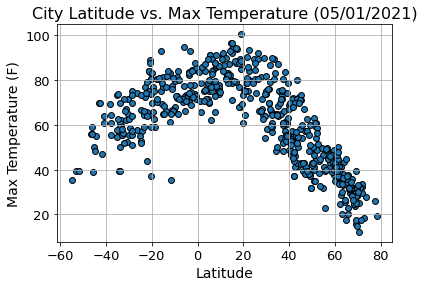

In [208]:
# Generate a scatter plot of Latitude vs. Temperature

#Make scatter plot
fig1= plt.subplots(figsize = (6, 4))
plt.scatter(City_Data['Lat'],City_Data["Max Temp"], marker = 'o', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Max Temperature (05/01/2021)', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Max Temperature (F)', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

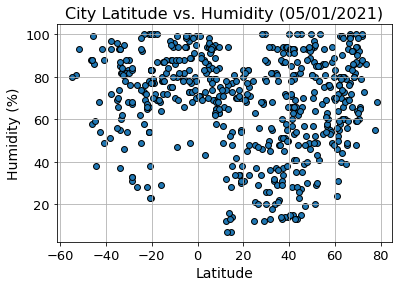

In [207]:
# Generate a scatter plot of Latitude vs. Humidity

#Make scatter plot
fig1= plt.subplots(figsize = (6, 4))
plt.scatter(City_Data['Lat'],City_Data["Humidity"], marker = 'o', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Humidity (05/01/2021)', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Humidity (%)', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

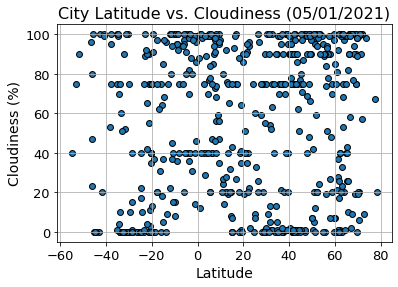

In [205]:
# Generate a scatter plot of Latitude vs. Cloudiness

#Make scatter plot
fig1= plt.subplots(figsize = (6, 4))
plt.scatter(City_Data['Lat'],City_Data["Cloudiness"], marker = 'o', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Cloudiness (05/01/2021)', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

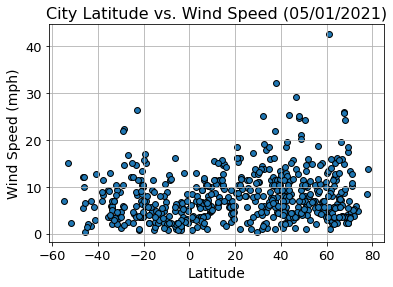

In [209]:
# Generate a scatter plot of Latitude vs. Windspeed

#Make scatter plot
fig1= plt.subplots(figsize = (6, 4))
plt.scatter(City_Data['Lat'],City_Data["Wind Speed"], marker = 'o', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Wind Speed (05/01/2021)', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()
plt.show

## Linear Regression

In [176]:
# Define the Northern and Southern Hemisphere Data
Northern_Hemisphere = City_Data[City_Data['Lat']>=0]

Southern_Hemisphere = City_Data[City_Data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7760410106565072


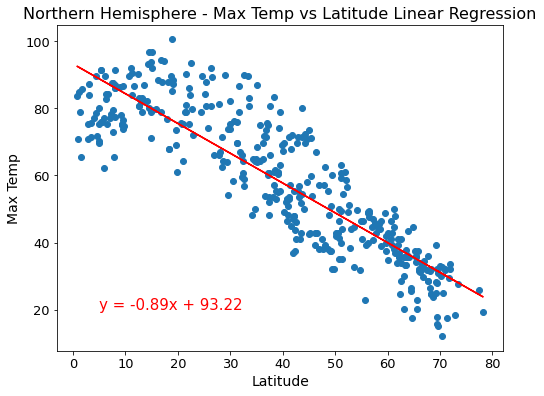

In [210]:
# Calculate the linear regression model for Max Temp vs. Latitude Linear Regression for the Northern Hemisphere
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere["Max Temp"]

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 20), fontsize = 15, color = "red")
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Max Temp', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3979475305344491


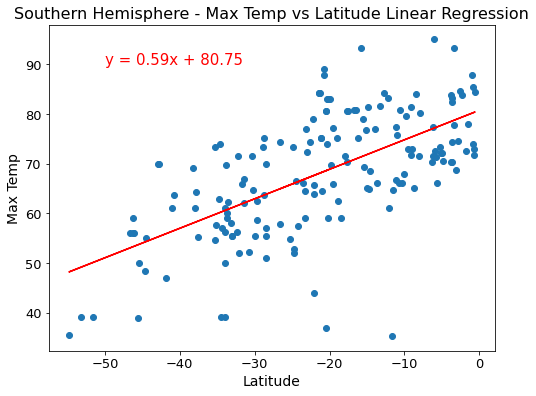

In [211]:
# Calculate the linear regression model for Max Temp vs. Latitude Linear Regression for the Southern Hemisphere
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 90), fontsize = 15, color = "red")
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Max Temp', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### Analysis Note 1: Based on the 2 plots above, it is represented in both that the closer the City is to the Equator (0 Degree Lat), the higher the Max Temperature. Thus the further away, the lower the Max Temperature in both Northern and Southern Hemisphere. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008953947203109698


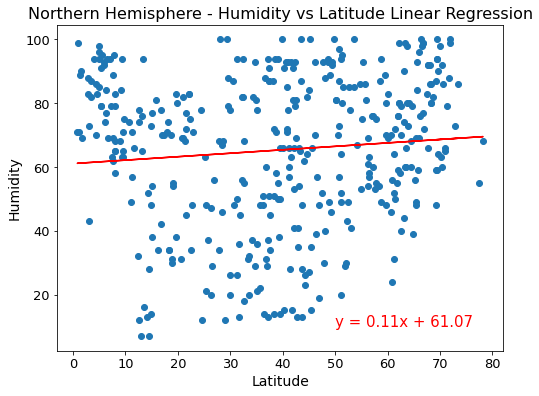

In [212]:
# Calculate the linear regression model for Humidity vs. Latitude Linear Regression for the Northern Hemisphere
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize = 15, color = "red")
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03106016030038164


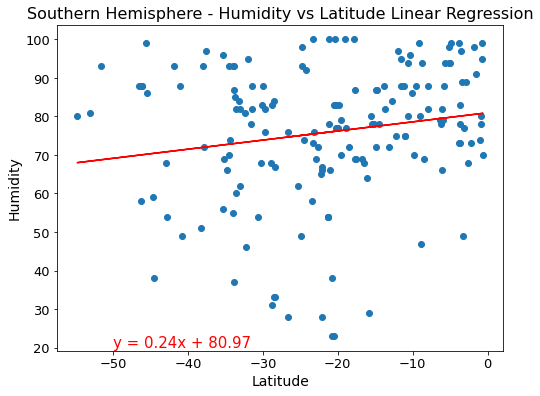

In [213]:
# Calculate the linear regression model for Humidity vs. Latitude Linear Regression for the Southern Hemisphere
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20), fontsize = 15, color = "red")
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

######  Analysis Note 2: Based on the 2 plots, it's reasonable to suggest that the closer to the Equator (0 degree Latitude), the more humid; however this is more accurately represented in the Southern Hemisphere. The Northern Hemisphere however does not have a significant correlation between Latitude and Humidity which suggests there are other factors that may contribute to the humidity rates. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018359696109461715


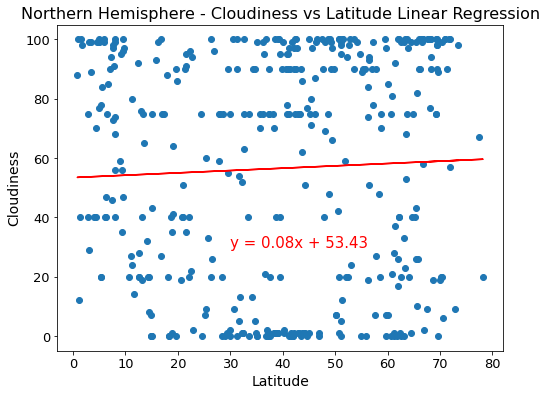

In [214]:
# Calculate the linear regression model for Cloudiness vs. Latitude Linear Regression for the Northern Hemisphere
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 30), fontsize = 15, color = "red")
plt.title('Northern Hemisphere - Cloudiness vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Cloudiness', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.054030823269912605


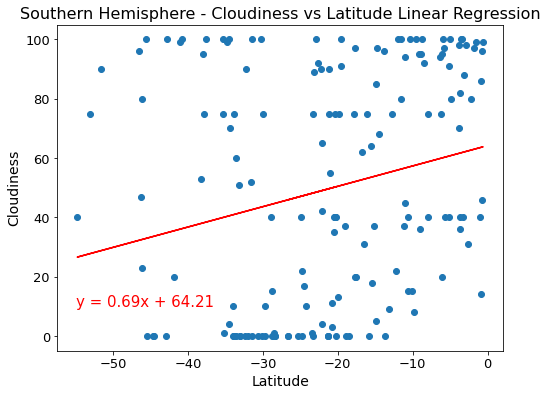

In [215]:
# Calculate the linear regression model for Cloudiness vs. Latitude Linear Regression for the Southern Hemisphere
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10), fontsize = 15, color = "red")
plt.title('Southern Hemisphere - Cloudiness vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Cloudiness', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

######  Analysis Note 3: Based on the plots above, it is represented that the further from the Equator (0 degree Latitude) in the Southern Hemisphere, the cloudier it is for that City. However, in the Northern Hemisphere, there is not a significant correlation between Latitude location and Cloudiness. There is a slight indication that the further from the Equator, the more Cloudy it may be, but that is not definitive. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007148200958560773


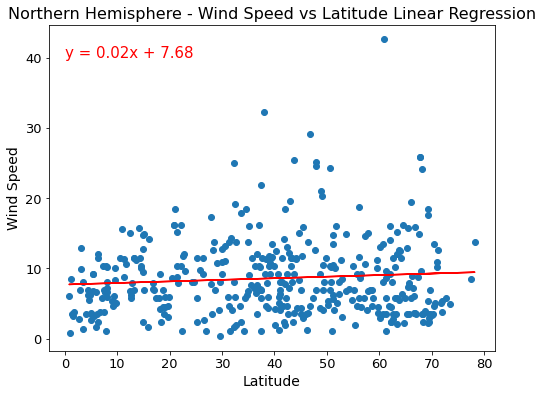

In [216]:
# Calculate the linear regression model for Wind Speed vs. Latitude Linear Regression for the Northern Hemisphere
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 40), fontsize = 15, color = "red")
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Wind Speed', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030120822785553832


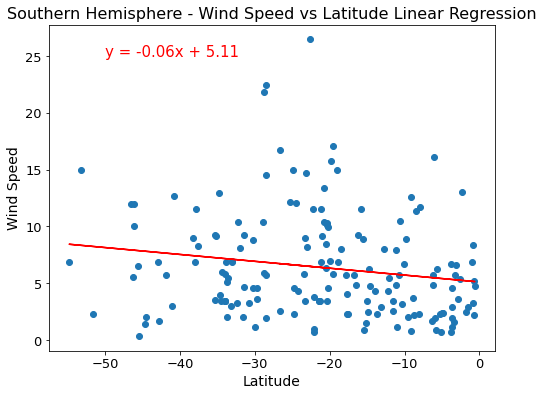

In [217]:
# Calculate the linear regression model for Wind Speed vs. Latitude Linear Regression for the Southern Hemisphere
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1= plt.subplots(figsize = (8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 25), fontsize = 15, color = "red")
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Wind Speed', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

###### Analysis Note 4: Based on the plots above, there is a slight correlation to the Wind Speed in a City and the distance to the Equator (0 degree Latitude). In both Hemispheres, there is a slight increase in Wind Speed for Cities further from the Equator, but not significant and the highest Speeds average in the Northern Hemisphere. 